In [1]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib

In [2]:
import warnings
warnings.filterwarnings('ignore')

!wget https://www.dropbox.com/s/6xiayuq12vt5wyz/dataset.zip

--2023-06-30 19:57:22--  https://www.dropbox.com/s/6xiayuq12vt5wyz/dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/6xiayuq12vt5wyz/dataset.zip [following]
--2023-06-30 19:57:23--  https://www.dropbox.com/s/raw/6xiayuq12vt5wyz/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucca3db3e498233db74e780f9938.dl.dropboxusercontent.com/cd/0/inline/B-9Vnhvh_j7vCPVeCDMn6qL2tH0HGb00JMbD5EeCVEQ2J65JU159g9fs9eDuZhc6SPbLZwfV8zKovdgtQar5DuXoHYpXZ_oHEno1MBP74xDF3zkyxdIzGZToBqTQgkfBt-LKFTZ1snJwk07u4ho0dV1Nz-xjFluDMKwG8pfNn_FowA/file# [following]
--2023-06-30 19:57:23--  https://ucca3db3e498233db74e780f9938.dl.dropboxusercontent.com/cd/0/inline/B-9Vnhvh_j7vCPVeCDMn6qL2tH0HGb00JMbD5EeCVEQ2J65JU159g9fs9eDuZhc6SPbLZwfV8zKovdgt

In [3]:
!unzip /kaggle/working/dataset.zip

Archive:  /kaggle/working/dataset.zip
   creating: dataset/
   creating: dataset/cassava/
  inflating: dataset/cassava/cropped_frame0.jpg  
  inflating: dataset/cassava/cropped_frame1.jpg  
  inflating: dataset/cassava/cropped_frame10.jpg  
  inflating: dataset/cassava/cropped_frame1001.jpg  
  inflating: dataset/cassava/cropped_frame102.jpg  
  inflating: dataset/cassava/cropped_frame104.jpg  
  inflating: dataset/cassava/cropped_frame107.jpg  
  inflating: dataset/cassava/cropped_frame110.jpg  
  inflating: dataset/cassava/cropped_frame1113.jpg  
  inflating: dataset/cassava/cropped_frame130.jpg  
  inflating: dataset/cassava/cropped_frame1349.jpg  
  inflating: dataset/cassava/cropped_frame1351.jpg  
  inflating: dataset/cassava/cropped_frame1352.jpg  
  inflating: dataset/cassava/cropped_frame1353.jpg  
  inflating: dataset/cassava/cropped_frame1354.jpg  
  inflating: dataset/cassava/cropped_frame1355.jpg  
  inflating: dataset/cassava/cropped_frame1356.jpg  
  inflating: dataset/c

In [4]:
maize_data = pathlib.Path('./dataset/maize')
maize_images = list(maize_data.glob('*.jpg'))
cassava_data = pathlib.Path('./dataset/cassava')
cassava_images = list(cassava_data.glob('*.jpg'))
grass_data = pathlib.Path('./dataset/grass')
grass_images= list(grass_data.glob('*.jpg'))
sugarcane_data = pathlib.Path('./dataset/sugarcane')
sugarcane_images= list(sugarcane_data.glob('*.jpg'))

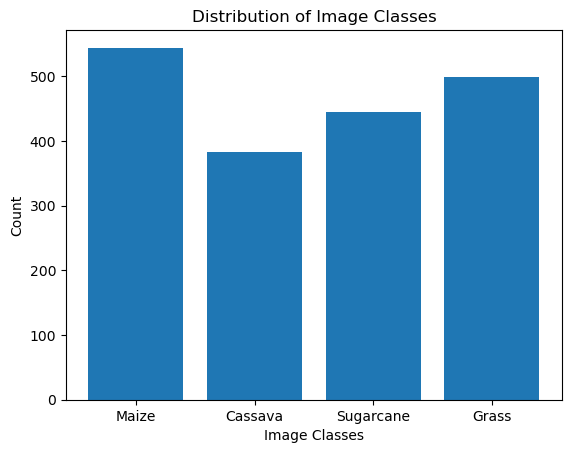

In [5]:
image_classes = ['Maize', 'Cassava', 'Sugarcane','Grass']
class_counts = [len(maize_images), len(cassava_images),len(sugarcane_images),len(grass_images)]

# Create the bar chart
plt.bar(image_classes, class_counts)

# Add labels and title
plt.xlabel('Image Classes')
plt.ylabel('Count')
plt.title('Distribution of Image Classes')

# Display the chart
plt.show()

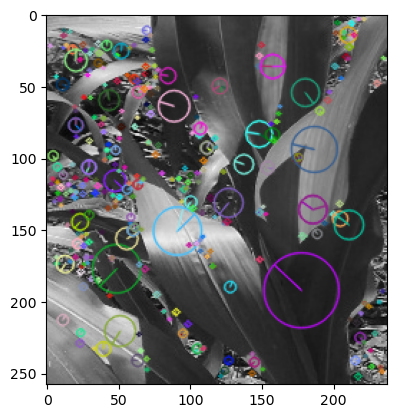

In [6]:
# using SIFT to extract features
img = cv2.imread(str(maize_images[0]))
sift = cv2.SIFT_create()
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)

# Mark interest points
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)

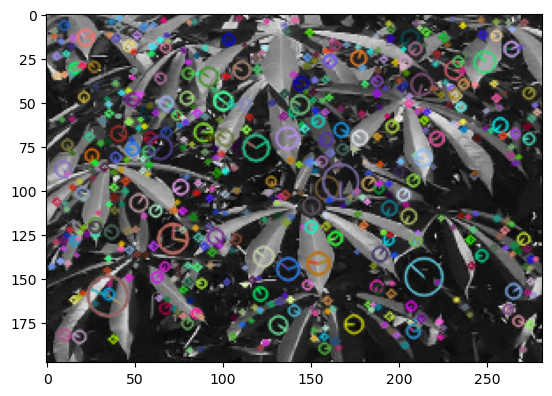

In [7]:
# using SIFT to extract features for cassava
img = cv2.imread(str(cassava_images[0]))
sift = cv2.SIFT_create()
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)

# Mark interest points
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)

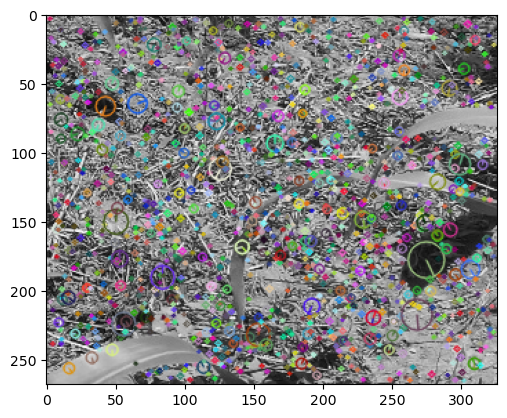

In [8]:
# using SIFT to extract features for Banana
img = cv2.imread(str(grass_images[0]))
sift = cv2.SIFT_create()
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)

# Mark interest points
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)

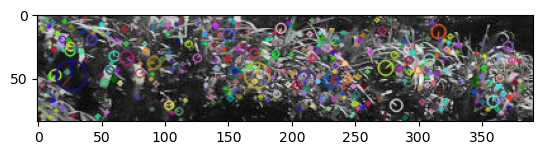

In [9]:
# using SIFT to extract features for Sugarcane
img = cv2.imread(str(sugarcane_images[0]))
sift = cv2.SIFT_create()
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
kp = sift.detect(gray, None)

# Mark interest points
sift_img=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_img)

In [13]:
# Split dataset into train and test sets for each class
maize_train_images, maize_test_images, maize_train_labels, maize_test_labels = train_test_split(maize_images, ['maize'] * len(maize_images), test_size=0.2, random_state=42)
cassava_train_images, cassava_test_images, cassava_train_labels, cassava_test_labels = train_test_split(cassava_images, ['cassava'] * len(cassava_images), test_size=0.2, random_state=42)
grass_train_images, grass_test_images, grass_train_labels, grass_test_labels = train_test_split(grass_images, ['grass'] * len(grass_images), test_size=0.2, random_state=42)
sugarcane_train_images, sugarcane_test_images, sugarcane_train_labels, sugarcane_test_labels = train_test_split(sugarcane_images, ['sugarcane'] * len(sugarcane_images), test_size=0.2, random_state=42)

In [16]:
# Combine the training and test splits for each class
train_images = maize_train_images + cassava_train_images + grass_train_images + sugarcane_train_images
train_labels = maize_train_labels + cassava_train_labels + grass_train_labels + sugarcane_train_labels
test_images = maize_test_images + cassava_test_images + grass_test_images + sugarcane_test_images
test_labels = maize_test_labels + cassava_test_labels + grass_test_labels + sugarcane_test_labels

In [17]:
# Step 1: Dataset Preparation
# Assuming you have your dataset prepared and split into training and test sets

# Step 2: Feature Extraction using SIFT
def extract_sift_features(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)
    return keypoints, descriptors

# Step 3: Build a Visual Vocabulary (Bag of Features)
def build_visual_vocabulary(descriptors, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(descriptors)
    return kmeans.cluster_centers_

# Step 4: Encoding Images with Bag of Features
def encode_image(image, visual_vocabulary):
    keypoints, descriptors = extract_sift_features(image)
    descriptor_counts = np.zeros(len(visual_vocabulary))
    if descriptors is not None:
        for descriptor in descriptors:
            distances = np.linalg.norm(visual_vocabulary - descriptor, axis=1)
            min_distance_idx = np.argmin(distances)
            descriptor_counts[min_distance_idx] += 1
    return descriptor_counts

# Step 5: Train KNN Classifier
def train_knn_classifier(features, labels, num_neighbors):
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(features, labels)
    return knn

# Step 6: Classify Test Images
def classify_images(test_images, knn_classifier, visual_vocabulary):
    test_features = []
    for image in test_images:
        img = cv2.imread(str(image))
        feature_vector = encode_image(img, visual_vocabulary)
        test_features.append(feature_vector)
    return knn_classifier.predict(test_features)

# Step 7: Evaluate Classifier Performance
def evaluate_classifier(predicted_labels, true_labels):
    accuracy = accuracy_score(true_labels, predicted_labels)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    
# Step 7: Evaluate Classifier Performance
def print_classification_report(predicted_labels, true_labels):
    report = classification_report(true_labels, predicted_labels)
    print(report)
    
def print_confusion_matrix(predicted_labels, true_labels):
    matrix = confusion_matrix(true_labels, predicted_labels)
    class_names = np.unique(true_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

In [18]:
# Extract SIFT features from training images
all_descriptors = []
for image in train_images:
    img = cv2.imread(str(image))
    _, descriptors = extract_sift_features(img)
    if descriptors is not None:
        all_descriptors.extend(descriptors)

# Build visual vocabulary
num_clusters = 100  # Number of visual words/clusters
visual_vocabulary = build_visual_vocabulary(all_descriptors, num_clusters)

In [19]:
# Encode training images with bag of features representation
train_features = []
for image in train_images:
    img = cv2.imread(str(image))
    feature_vector = encode_image(img, visual_vocabulary)
    train_features.append(feature_vector)

# Train KNN classifier
num_neighbors = 5  # Number of nearest neighbors
knn_classifier = train_knn_classifier(train_features, train_labels, num_neighbors)

# Classify test images
predicted_labels = classify_images(test_images, knn_classifier, visual_vocabulary)

# Evaluate classifier performance
evaluate_classifier(predicted_labels, test_labels)

Accuracy: 88.27%


              precision    recall  f1-score   support

     cassava       0.76      0.82      0.79        77
       grass       0.93      0.99      0.96       100
       maize       0.89      0.93      0.91       109
   sugarcane       0.94      0.76      0.84        89

    accuracy                           0.88       375
   macro avg       0.88      0.87      0.87       375
weighted avg       0.89      0.88      0.88       375



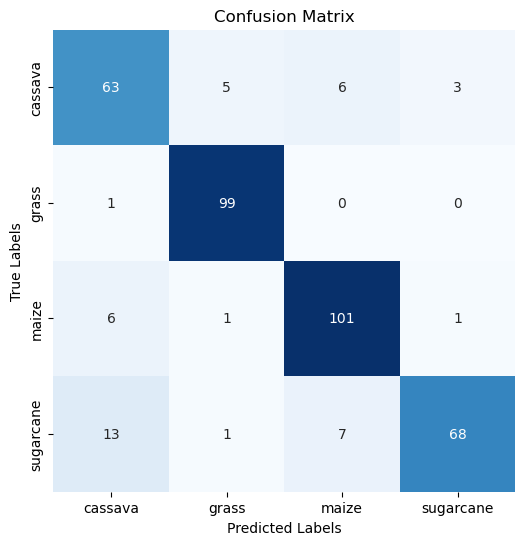

In [20]:
# Evaluate classifier performance
print_classification_report(predicted_labels, test_labels)
print_confusion_matrix(predicted_labels, test_labels)